In [176]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [280]:
# Importing the data
df_drivers = pd.read_csv('Formula1-DatasetFull/raw_data/drivers.csv')
# df_constructor_results = pd.read_csv('Formula1-DatasetFull/raw_data/constructor_results.csv')
# df_constructor_standings = pd.read_csv('Formula1-DatasetFull/raw_data/constructor_standings.csv')
df_driver_standings = pd.read_csv('Formula1-DatasetFull/raw_data/driver_standings.csv')
# df_qualifying = pd.read_csv('Formula1-DatasetFull/raw_data/qualifying.csv')
df_races = pd.read_csv('Formula1-DatasetFull/raw_data/races.csv')
df_results = pd.read_csv('Formula1-DatasetFull/raw_data/results.csv')

,driverId,driverRef,nationality,dob,raceId,position,wins,name,date,time,fastestLapTime,points,year
0,1,hamilton,British,1985-01-07,18,1,1,Australian Grand Prix,2008-03-16,04:30:00,1:27.452,10.0,2008
8,1,hamilton,British,1985-01-07,19,1,1,Malaysian Grand Prix,2008-03-23,07:00:00,1:35.462,4.0,2008
15,8,raikkonen,Finnish,1979-10-17,19,2,1,Malaysian Grand Prix,2008-03-23,07:00:00,1:35.405,10.0,2008
26,1,hamilton,British,1985-01-07,20,3,1,Bahrain Grand Prix,2008-04-06,11:30:00,1:35.520,0.0,2008
33,8,raikkonen,Finnish,1979-10-17,20,1,1,Bahrain Grand Prix,2008-04-06,11:30:00,1:33.709,8.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25296,579,fangio,Argentine,1911-06-24,784,2,1,Argentine Grand Prix,1956-01-22,\N,\N,0.0,1956
25297,579,fangio,Argentine,1911-06-24,784,2,1,Argentine Grand Prix,1956-01-22,\N,\N,5.0,1956
25313,641,taruffi,Italian,1906-10-12,817,1,1,Swiss Grand Prix,1952-05-18,\N,\N,9.0,1952
25330,579,fangio,Argentine,1911-06-24,825,1,1,Swiss Grand Prix,1951-05-27,\N,\N,9.0,1951


# <span style="color:LightGreen"> Cleaning Data Procedure</span>

<font size = "5">

Filtering/Cleaning the data consisted of converting times/dates from the ```object``` type to the ```datetime64[ns]``` type and only considering the countries that had *at least* one grand prix win. These cleaning/filtering processes were done after the merging of the original datasets provided - drivers, driver_standings, races, and results. The dates for each of the races and dates of birth (for each driver) were converted into a datetime variable using the ```to_datetime()``` function provided by the pandas package. The years for the dates (on which the races took place) were extracted from the ```date``` variable using the ```dt.to_period()``` and ```astype()``` functions. The ```dt.to_period()``` function converted the datetime variable into a ```period[A-DEC]``` type variable. Using the ```astype()``` function, the ```subset3["year"]``` was converted into a string and then into an integer. The final step in the cleaning procedure (to obtain our main data set) was to use the ```.query()``` function to obtain the data win at least one grand prix win.


In [364]:
# subsetting the datasets above of the variables we need and want to include for this case
drivers_subset = df_drivers[["driverId","driverRef","nationality","dob"]]
standings_subset = df_driver_standings[["raceId","driverId","position","wins"]]
races_subset = df_races[["raceId","name","date","time"]]
results_subset = df_results[["raceId","driverId","fastestLapTime","points"]]

# merging the data (place holder names)
subset1 = pd.merge(drivers_subset, standings_subset, on="driverId") # 1st merge
subset2 = pd.merge(subset1, races_subset, on="raceId") # 2nd merge
subset3 = pd.merge(subset2, results_subset, on=["driverId","raceId"]) # 3rd merge

# converting to datetime and extracting years (and converting into int)
subset3["date"] = pd.to_datetime(subset3["date"]) # convert date variable from object to datetime64[ns]
subset3["dob"] = pd.to_datetime(subset3["dob"]) # convert date variable from object to datetime64[ns]
subset3["year"] = subset3["date"].dt.to_period('y').astype(str).astype(int) # extract year from datetime and convert to int

# Creating main data set for countries with at least 1 grand prix win 
dataset_main = subset3.query("wins >= 1")
# displaying main data set
display(dataset_main)

,driverId,driverRef,nationality,dob,raceId,position,wins,name,date,time,fastestLapTime,points,year
0,1,hamilton,British,1985-01-07,18,1,1,Australian Grand Prix,2008-03-16,04:30:00,1:27.452,10.0,2008
8,1,hamilton,British,1985-01-07,19,1,1,Malaysian Grand Prix,2008-03-23,07:00:00,1:35.462,4.0,2008
15,8,raikkonen,Finnish,1979-10-17,19,2,1,Malaysian Grand Prix,2008-03-23,07:00:00,1:35.405,10.0,2008
26,1,hamilton,British,1985-01-07,20,3,1,Bahrain Grand Prix,2008-04-06,11:30:00,1:35.520,0.0,2008
33,8,raikkonen,Finnish,1979-10-17,20,1,1,Bahrain Grand Prix,2008-04-06,11:30:00,1:33.709,8.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25296,579,fangio,Argentine,1911-06-24,784,2,1,Argentine Grand Prix,1956-01-22,\N,\N,0.0,1956
25297,579,fangio,Argentine,1911-06-24,784,2,1,Argentine Grand Prix,1956-01-22,\N,\N,5.0,1956
25313,641,taruffi,Italian,1906-10-12,817,1,1,Swiss Grand Prix,1952-05-18,\N,\N,9.0,1952
25330,579,fangio,Argentine,1911-06-24,825,1,1,Swiss Grand Prix,1951-05-27,\N,\N,9.0,1951


# <span style="color:LightGreen"> Dataset and Descriptive Statistics</span>

<font size = "5">

The chunk below displays our main dataset for our report along with a table of descriptive statistics for the main variables that we are concerned with answering our question of performance of F1 drivers over time and by nationality. This table of descriptive statistics displays generic statistics of four variables: position, wins, and points. Not all the variables in our main dataset were used because the other variables are hold-overs (e.g. driverId) from the merging process and others are used to help computed aggregate statistics (e.g. nationality and do). The varaibles that are considered provided the most useful and applicable information for our investigation; the three of these variables we assumed to have a high correlation between one another and can be the deciding factor for a driver winning an F1 race. A balance of points and position can determine whether or not a racer wins in F1. Nonetheless, if a country is in the top 3 for wins overall (for example), then we would expect said country to also have a high position - order in which drivers finished the race - and high number of points - bonus for whether they finished 8th place or above. Furthermore, when plotting these variables over, time, if there was an increase in driver performance, then there would be an upward trend in points awarded to the drivers and an inverse trend in position (because the drivers for the countries with the most wins will have a lower average position). For instance, consider the first two plots below for number of wins and position. Since position must be inversely correlation with the number of wins, we would expect a downward trend in average position for countries with a greater number of wins. We anticipated we would find something similar over time with the number of wins and average points over time, when plotted together.

One variable that we thought of including in our report, but could not, was the ```fastestLapTime``` variable from the ```results.csv``` dataset. The original data only includes the fastest lap times from 2000 to the present. Because our investigation spans across *all* years (1950-2023) of the data, we did not chose to use this data. Furthermore, converting the times into minutes or hours is a process that is beyond the scope of this class and would potentially require us to use unfamiliar packages.

In [367]:
# choosing selected variables used in this investigation 
descriptive_var = dataset_main[["position","wins","points"]]
display(descriptive_var.describe())

,position,wins,points
count,3872.000000,3872.000000,3872.000000
mean,3.185950,2.298037,6.581942
std,2.295983,1.958763,7.036027
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,3.000000,2.000000,6.000000
75%,4.000000,3.000000,10.000000
max,26.000000,15.000000,50.000000


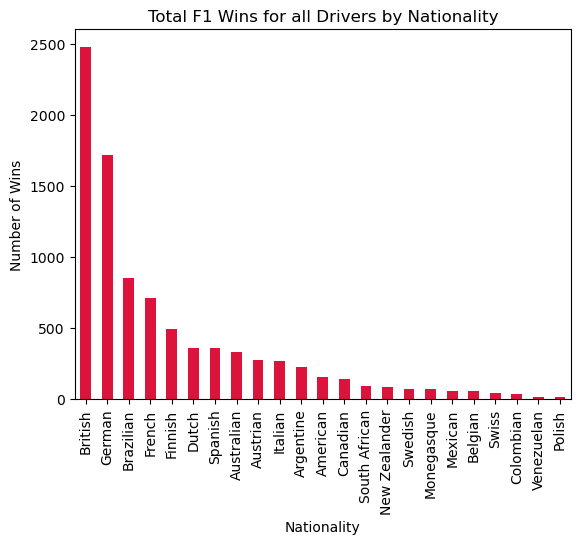

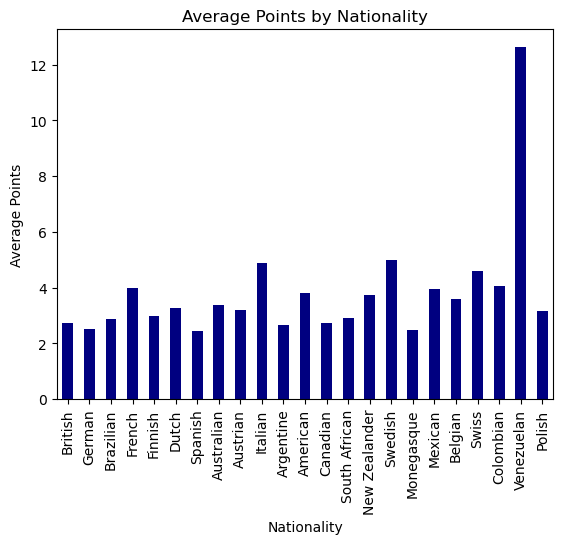

In [368]:
example_stats = dataset_main.groupby(dataset_main["nationality"]).agg(avg_position = ("position","mean"),
                                                                      num_wins = ("wins","sum")).sort_values(by="num_wins", ascending=False)
example_stats["num_wins"].plot(kind="bar",color="crimson")
plt.title('Total F1 Wins for all Drivers by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Wins')
plt.legend().remove()
plt.show()

example_stats["avg_position"].plot(kind="bar", color="navy")
plt.title("Average Points by Nationality")
plt.xlabel("Nationality")
plt.ylabel("Average Points")
plt.legend().remove()
plt.show()


# <span style="color:LightGreen"> Displaying Wins for All Drivers by Nationality</span>

<font size = "5">

In the brainstorming stage of this project, we decided to look at potential factors that might influence the total number of wins for a particular country. With many factors available to study and filter from the data, we chose to investigate if the increase in wins across time could (in part) be the result of better driving across each country. In the aggregate, the total number of wins rises steadily over time, thus, investigating whether or not drivers overall are getting better.

Text(0.5, 1.0, 'Wins for all Drivers & Countries over Time')

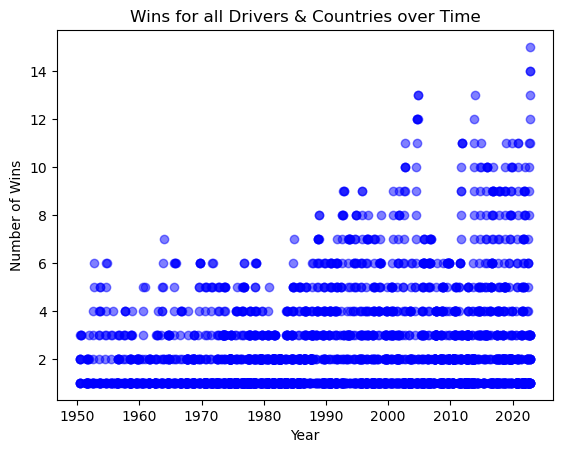

In [356]:
# scatter plot of total wins 
plt.scatter(dataset_main['date'], dataset_main['wins'], alpha=0.5, color = "blue")
plt.xlabel("Year")
plt.ylabel("Number of Wins")
plt.title("Wins for all Drivers & Countries over Time")

## <span style="color:LightGreen"> Trend of Points, Wins, and Position over time</span>

<font size = "5">

The code below calculates the average number of points, wins, and position annually and plots it over time using the ```year``` variable. We noticed that there is a slight upward trend in wins from about 1990 onward which can be seen in the trend for average number of points. However, there is a large gap in the average annual number of points and wins from around 2010 onward. No other variable in the plot indicates any correlation with the massive rise in average number of points in the data. We also included the number of unique drivers from the data set to see if maybe an increase/decrease in number of drivers competing would have had an effect on average annual number of points. Further below, we also chose to compare percent changes in average annual number of points and wins to see if there were any trends that could not be viewed in the plot directly below. 

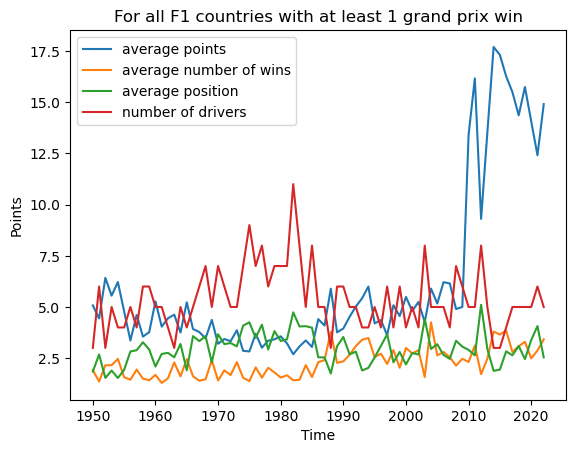

In [370]:
# Creating subset of main data set to calculate average points across individual years
subset = dataset_main.groupby(dataset_main["year"]).agg(avg_points = ("points","mean"),
                                                               avg_wins = ("wins","mean"),
                                                               avg_position = ("position","mean"),
                                                               num_unique_drivers = ("driverRef","nunique")).sort_values(by="year", ascending=False).reset_index()

# plot for average points, average wins, and number of unique drivers over years
subset[["year","avg_points","avg_wins","avg_position","num_unique_drivers"]].set_index("year").plot()
plt.xlabel("Time")
plt.ylabel("Points")
plt.title("For all F1 countries with at least 1 grand prix win")
plt.legend(["average points","average number of wins", "average position","number of drivers"])

<font size = "5">
Calculating (and plotting) the percent change would help us standardize the variables by observing significant changes in the data across average number of points, average number of wins, and the number of unique drivers over the years for each country (with at least one grand prix win).


Text(0, 0.5, 'Percent Change')

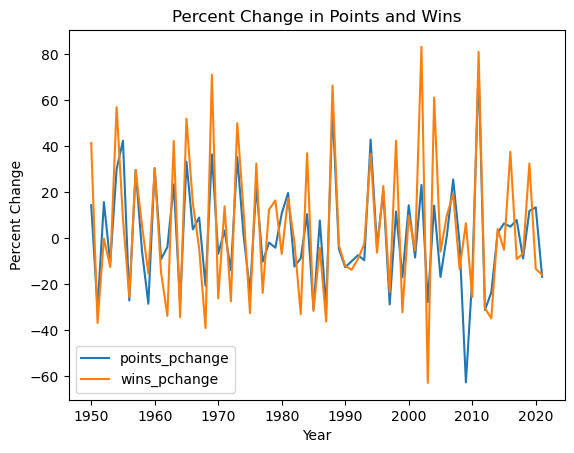

In [379]:

# Percent change calculations 
# Write your own code
subset["points_pchange"] = subset["avg_points"].diff() / subset["avg_points"].shift(1) * 100
subset["wins_pchange"] = subset["avg_wins"].diff() / subset["avg_wins"].shift(1) * 100
subset["position_pchange"] = subset["avg_position"].diff() / subset["avg_position"].shift(1) * 100
subset[["year", "points_pchange","wins_pchange"]].set_index("year").plot()
plt.title("Percent Change in Points and Wins")
plt.xlabel("Year")
plt.ylabel("Percent Change")

<font size = "5">

The percent change for variables, points and wins, show an interesting feature that we did not see in the previous chart. Within some decades, there are similar trends among both variables, which can be seen when the two charts align with each other. For instance, when there is either a percent increase/decrease in one variable, the other is show to exhibit a similar trend in it's percent change. This would explain that while the number of points a driver earns in the race is correlated with whether or not they win, it is not the only covariate that should be considered.

In [374]:
d = {'^(\d+\.\d+)$': r'00:00:\1', '^(\d+:\d+\.\d+)$': r'00:\1'}
dataset_main["fastestLapTime"].replace(d, regex=True).apply(pd.to_timedelta)


ValueError: unit abbreviation w/o a number

<font size = "6">

<span style="color:white"> Purpose </span>

<font size = "5">

We chose to examine success across nationality and time, more specifically, the age groups of different drivers. The purpose of examining how well different countries performed in the F1 races were to show which countries competed the most often with the greatest number of (unique) drivers and spot comparisons over the success of their drivers across different generations of drivers. We grouped these drivers based on their birth year into bins corresponding to generations.